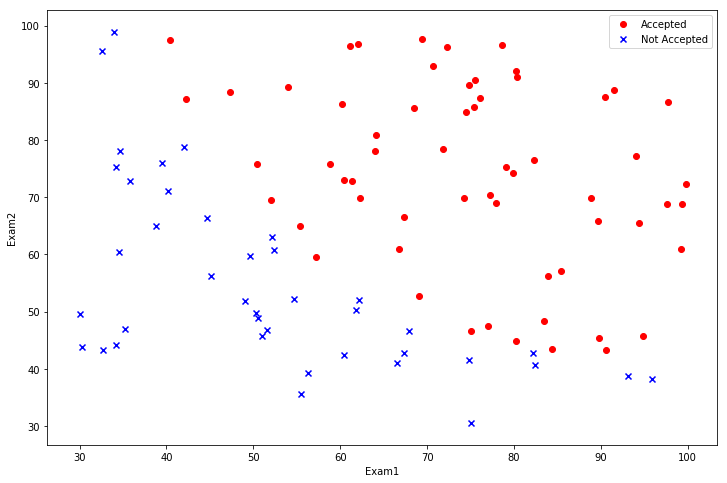

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

path = os.getcwd() + '/git/data/ex2data1.txt'
data = pd.read_csv(path, header = None , names = ['Exam1','Exam2','Acceptance'])
data.insert(0,"ones",1)

cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
positive = data[data['Acceptance'].isin([1])]
negative = data[data['Acceptance'].isin([0])]
fig , ax = plt.subplots(figsize = (12,8))
ax.scatter(positive['Exam1'],positive['Exam2'], c = 'r', marker = 'o', label = 'Accepted')
ax.scatter(negative['Exam1'],negative['Exam2'], c = 'b', marker = 'x', label = 'Not Accepted')
ax.set_xlabel("Exam1")
ax.set_ylabel("Exam2")
ax.legend()

In [20]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))
def costFunction(theta,X,y):
    
    final = (-1)/len(X)*((np.log(sigmoid(X.dot(theta))).T).dot(y) + (np.log(1 - (sigmoid(X.dot(theta)))).T).dot(1-y))
    return final[0]

In [136]:
theta = np.array([0,0,0])

In [110]:
def gradient(theta,X,y):
    theta = np.reshape(theta,(theta.size,1))
    pred = sigmoid(np.dot(X,theta))
    grad = np.dot(X.T,pred-y)/len(X)
    #grad[1:] = grad[1:] + lamda*theta[1:]/m
    return grad.flatten()
gradient(theta,X,y)

array([ -0.1       , -12.00921659, -11.26284221])

In [130]:
theta = np.array([0,0,0])
theta.shape
import scipy.optimize as opt

result = opt.fmin_tnc(func = costFunction, x0 = theta, fprime = gradient, args = [X,y])
weights = result[0]
weights

array([-25.16131854,   0.20623159,   0.20147149])

In [113]:
costFunction(result[0],X,y)

0.20349770158947494

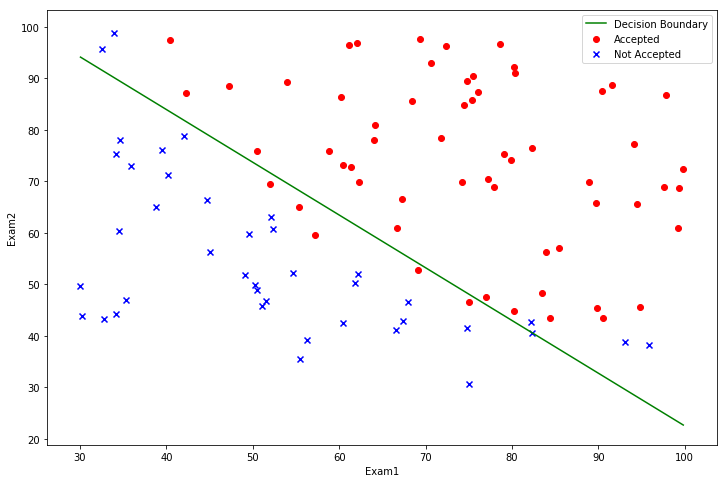

In [135]:
x = np.linspace(data.Exam1.min(),data.Exam1.max(),100)
y = -(weights[0] + weights[1]*x)/weights[2]
fig , ax = plt.subplots(figsize = (12,8))
ax.plot(x,y,c = 'g', label = "Decision Boundary")
ax.scatter(positive['Exam1'],positive['Exam2'], c = 'r', marker = 'o', label = 'Accepted')
ax.scatter(negative['Exam1'],negative['Exam2'], c = 'b', marker = 'x', label = 'Not Accepted')
ax.set_xlabel("Exam1")
ax.set_ylabel("Exam2")
ax.legend()